In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils
import os

plt.rcParams.update(utils.get_plt_settings())

## Segmentlänge

In [2]:
cov = [45.94, 53.78, 60.93, 62.01, 54.18, 59.73, 64.81, 67, 78.93, 79.47, 80.15, 80.31,
      69.4, 74.18, 76.69, 77.14]
mae = [14.20, 13.27, 13.03, 12.68, 14.20, 13.86, 13.23, 13.12, 17.62, 15.39, 14.35, 14.01,
       16.34, 14.94, 14.17, 13.96]
model = ["RF-Klassifikator", "RF-Klassifikator", "RF-Klassifikator", "RF-Klassifikator",
        "XGB-Klassifikator", "XGB-Klassifikator", "XGB-Klassifikator", "XGB-Klassifikator",
        "RF-Regressor", "RF-Regressor", "RF-Regressor", "RF-Regressor",
        "XGB-Regressor", "XGB-Regressor", "XGB-Regressor", "XGB-Regressor"]
model_color = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
segment_lengths = [5, 10, 20, 30, 5, 10, 20, 30, 5, 10, 20, 30, 5, 10, 20, 30]
df_segment_length = pd.DataFrame({'Coverage': cov, 'MAE': mae, 'model': model, 'model color': model_color,
                                 'segment length': segment_lengths})

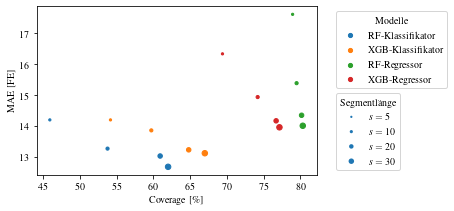

In [3]:
width, height = utils.get_plt_big_size()
fig, ax = plt.subplots(figsize=(width*0.85, height*0.85))

for i, model in enumerate(df_segment_length['model'].unique()):
    curr = df_segment_length[df_segment_length['model']==model]
    curr.plot.scatter("Coverage", "MAE", c=colors[i], ax=ax, label=model, s=[5,10,20,30])
legend1 = ax.legend(loc='upper left', title='Modelle', bbox_to_anchor=(1.05, 1.0))
ax.add_artist(legend1)
l1 = plt.scatter([],[], s=5, edgecolors='none', color=colors[0])
l2 = plt.scatter([],[], s=10, edgecolors='none', color=colors[0])
l3 = plt.scatter([],[], s=20, edgecolors='none', color=colors[0])
l4 = plt.scatter([],[], s=30, edgecolors='none', color=colors[0])
labels = ["$s=5$", "$s=10$", "$s=20$", "$s=30$"]
legend2 = ax.legend([l1, l2, l3,l4], labels,
                    loc="lower left", title="Segmentlänge", bbox_to_anchor=(1.05, 0))
plt.xlabel("Coverage [\%]")
plt.ylabel("MAE [FE]")
plt.savefig(os.path.join(utils.get_thesis_pic_path(),"segment-length-variation.pdf"), transparent=True, bbox_inches='tight', dpi=300)

# Threshold

In [4]:
cov = [29.30, 34.90, 42.46, 53.78, 31.51, 41.99, 51.15, 59.73, 20.19, 46.23, 71.16, 79.47, 26.76, 47.59, 63.74, 74.18]
mae = [11.39, 11.86, 12.44, 13.27, 11.39, 12.44, 13.23, 13.86, 9.83, 12.57, 14.61, 15.39, 10.52, 12.66, 14.04, 14.94]

threshold = [5, 10, 15, 20, 5, 10, 15, 20, 5, 10, 15, 20, 5, 10, 15, 20]

model = ["RF-Klassifikator", "RF-Klassifikator", "RF-Klassifikator", "RF-Klassifikator",
        "XGB-Klassifikator", "XGB-Klassifikator", "XGB-Klassifikator", "XGB-Klassifikator",
        "RF-Regressor", "RF-Regressor", "RF-Regressor", "RF-Regressor",
        "XGB-Regressor", "XGB-Regressor", "XGB-Regressor", "XGB-Regressor"]
model_color = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
df_threshold = pd.DataFrame({'Coverage': cov, 'MAE': mae, 'model': model, 'model color': model_color,
                            'threshold': threshold})


In [5]:
df_threshold['model'].unique()

array(['RF-Klassifikator', 'XGB-Klassifikator', 'RF-Regressor',
       'XGB-Regressor'], dtype=object)

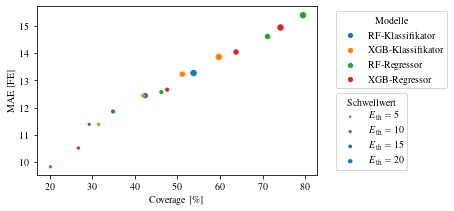

In [6]:
fig, ax = plt.subplots(figsize=(width*0.85, height*0.85))

for i, model in enumerate(df_threshold['model'].unique()):
    curr = df_threshold[df_threshold['model']==model]
    curr.plot.scatter("Coverage", "MAE", c=colors[i], ax=ax, label=model, s=[5,10,20,30])
legend1 = ax.legend(loc='upper left', title='Modelle', bbox_to_anchor=(1.05, 1.0))
ax.add_artist(legend1)
l1 = plt.scatter([],[], s=5, edgecolors='none', color=colors[0])
l2 = plt.scatter([],[], s=10, edgecolors='none', color=colors[0])
l3 = plt.scatter([],[], s=15, edgecolors='none', color=colors[0])
l4 = plt.scatter([],[], s=20, edgecolors='none', color=colors[0])
labels = ["$E\\textsubscript{th}=5$", "$E\\textsubscript{th}=10$", "$E\\textsubscript{th}=15$",
          "$E\\textsubscript{th}=20$"]
legend2 = ax.legend([l1, l2, l3,l4], labels,
                    loc="lower left", title="Schwellwert", bbox_to_anchor=(1.05, 0))
plt.xlabel("Coverage [\%]")
plt.ylabel("MAE [FE]")
plt.savefig(os.path.join(utils.get_thesis_pic_path(),"threshold-variation.pdf"), transparent=True, bbox_inches='tight', dpi=300)